In [ ]:
# IGNORE THIS CELL WHICH CUSTOMIZES LAYOUT AND STYLING OF THE NOTEBOOK !
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings = lambda *a, **kw: None
plt.rcParams["figure.figsize"]=16,10
plt.rcParams.update({'font.size': 16})

In [ ]:
import os
project_root = os.path.dirname(os.getcwd())
output_path = os.path.join(project_root, 'outputs')
input_path = os.path.join(project_root, 'data')

In [ ]:
from psy_simple.plotters import CMap, Bounds
from psy_maps.plotters import Transform, MapPlot2D, LonLatBox, MapPlotter
from psyplot.plotter import Plotter
import cartopy.crs as ccrs
import psyplot.project as psy
import xarray as xr
import numpy as np
import cfgrib
import icon_vis.modules as iconvis
import zarr
import glob
from PIL import Image

In [ ]:
ds_final = xr.open_zarr("/scratch/sadamov/aldernet/data").set_coords((
    "longitude", "latitude", "time", "step", "valid_time"))

data_reduced = ds_final.isel(y=slice(450, 514), x=slice(500, 628))
# data_reduced = ds_final

In [ ]:
data_reduced.CORY.data = np.log10(data_reduced.CORY.data + 1)

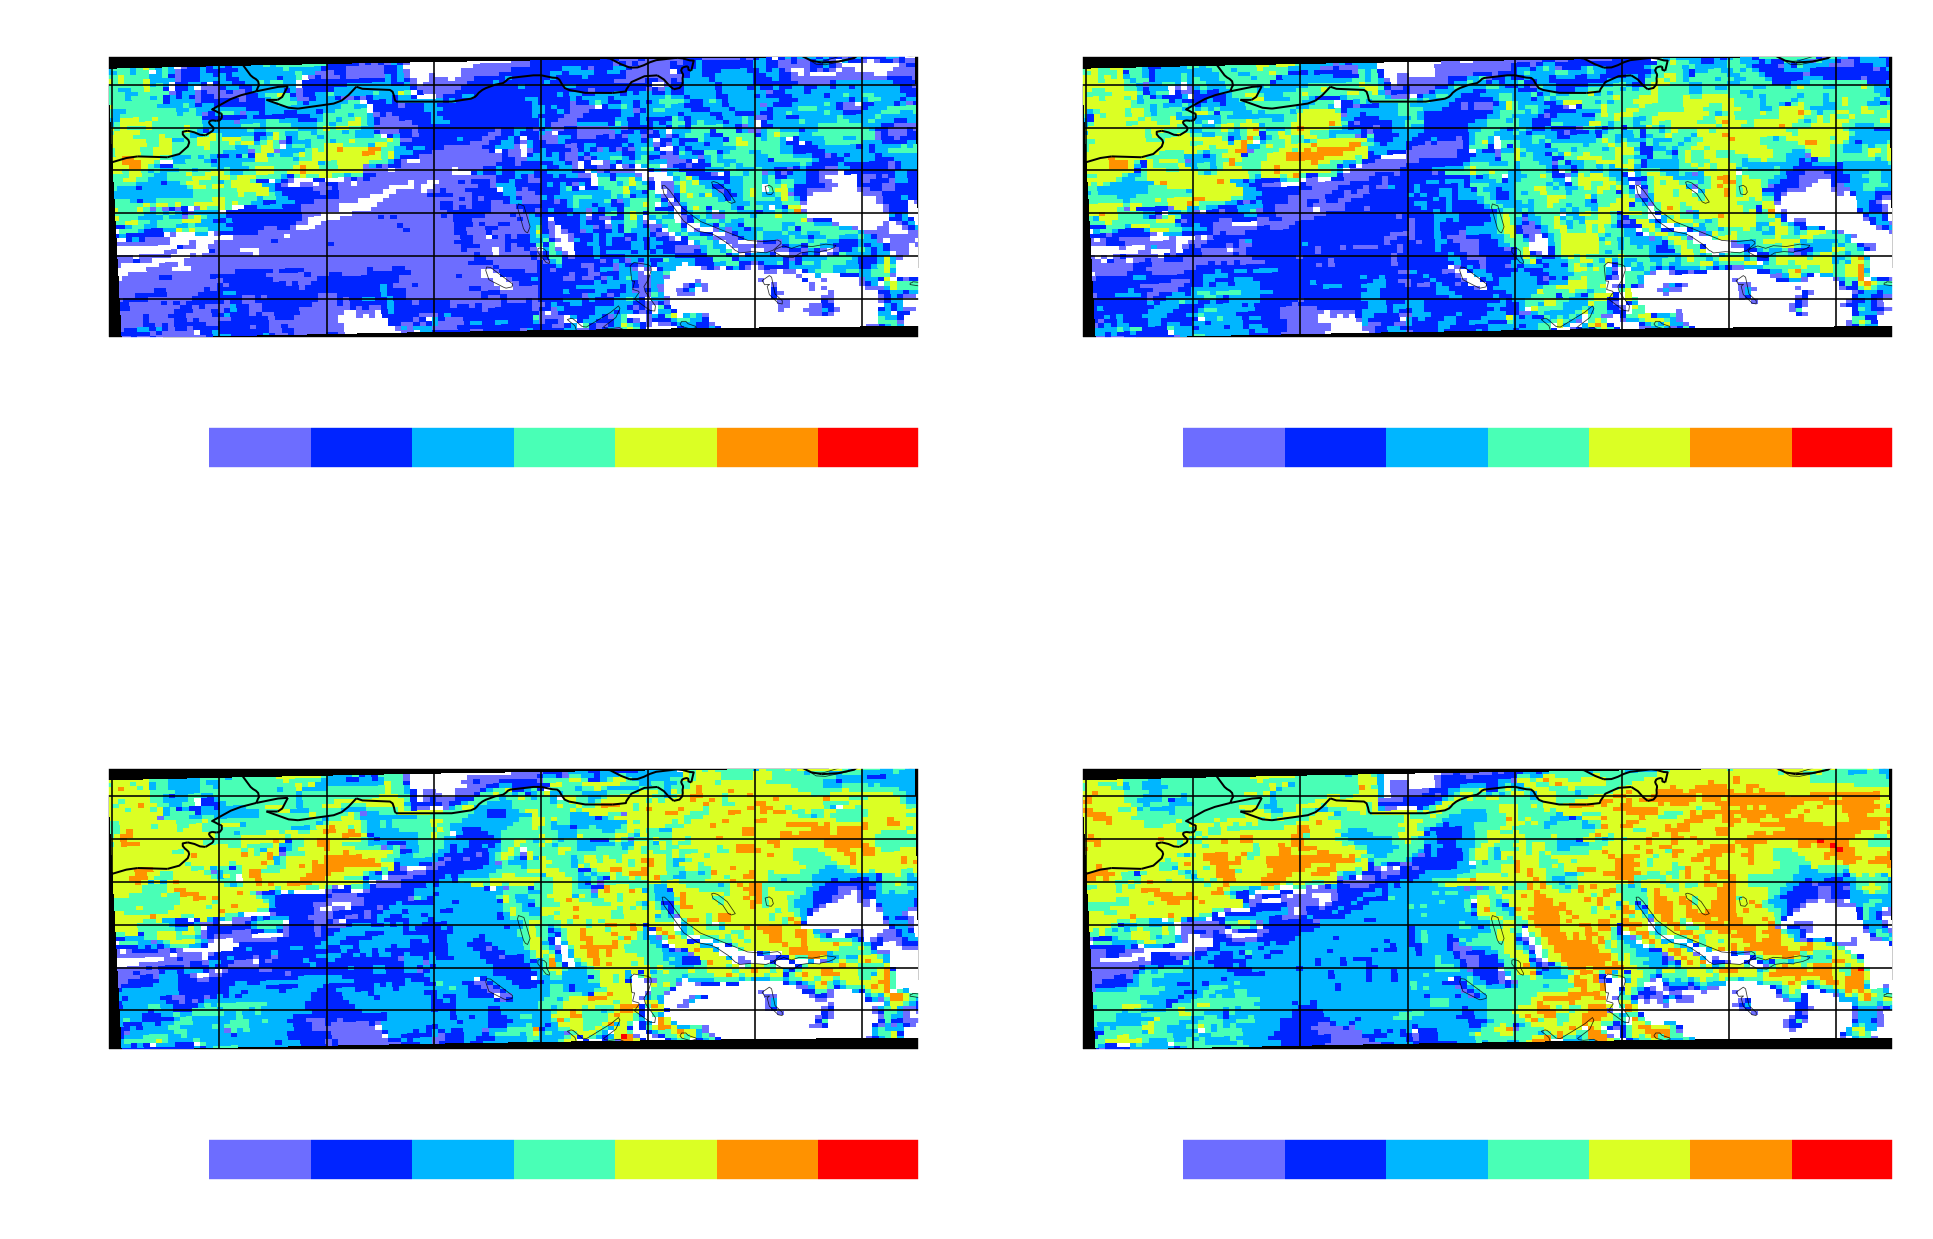

In [92]:
plot1 = data_reduced.psy.plot.mapplot(
    name="CORY",
    time=[10, 11, 12, 13],
    sort=["time"],
    ax=(2, 2),
    title="CORY %c")

colorbar=[x / 10.0 for x in range(0, 41, 5)]
plot1.update(bounds = colorbar, 
             cticks = colorbar)

# plot1.keys('colors')
# plot1.docs("cticks")

# plot1.docs("bounds")

# h = plot1.plotters[0].ax.imshow(data_reduced.CORY.data[0, : ,:], vmin = 0, vmax = 4)
# plot1.plotters[0].ax.figure.colorbar(h)

# arr = plot1[-1]
# plot1[:-1].share(arr, keys='colors')

# arr.psy.update()
# plot1.show()

# plot1.share(keys='colors')
# plot1.show()

# plot1.update(
#     enable_post=True,
#     post="""
# self.data(0,4)
#     """)
# plot1.show()

# map_extent=[5.5, 11.0, 45.5, 48.0]


In [ ]:
# for time in range(1, 25):
#     plot1 = ds_final.psy.plot.mapplot(
#         name="ALNUtune",
#         time=time,
#         sort=["time"],
#         title="ALNUtune %c",
#         map_extent=[5.5, 11.0, 45.5, 48.0])

#     plt.ioff()
#     with plot1 as sp:
#         sp.export(output_path + '/map_' + str(time).zfill(3) + '.png')
#     plt.ion


In [ ]:
# frames = [Image.open(image) for image in sorted(glob.glob(f"{output_path}/*.png"))]
# frame_one = frames[0]
# frame_one.save(output_path + "/my_awesome.gif", format="GIF", append_images=frames,
#                save_all=True, duration=200, loop=0)
